## Model Selection using RFE (Bike_Assignment)

### Importing and Understanding Data

In [429]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [430]:
import pandas as pd
import numpy as np

In [431]:
# Importing Housing.csv
bike = pd.read_csv('day.csv')

In [432]:
# Looking at the first five rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Preparation

### Dummy Variables

In [433]:
del bike['dteday']
del bike['instant']

In [434]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [435]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [436]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [437]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [438]:
bike.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [439]:
bike.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [440]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [441]:
for i in range(len(bike["season"])):
    if bike["season"][i] == 1:
        bike["season"][i] = "spring"
    elif bike["season"][i] == 2:
        bike["season"][i] = "summer"
    elif bike["season"][i] == 3:
        bike["season"][i] = "fall"
    elif bike["season"][i] == 4:
        bike["season"][i] = "winter"

In [442]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [443]:
for i in range(len(bike["mnth"])):
    if bike["mnth"][i] == 1:
        bike["mnth"][i] = "Jan"
    elif bike["mnth"][i] == 2:
        bike["mnth"][i] = "Feb"
    elif bike["mnth"][i] == 3:
        bike["mnth"][i] = "Mar"
    elif bike["mnth"][i] == 4:
        bike["mnth"][i] = "Apr"
    elif bike["mnth"][i] == 5:
        bike["mnth"][i] = "May"
    elif bike["mnth"][i] == 6:
        bike["mnth"][i] = "Jun"
    elif bike["mnth"][i] == 7:
        bike["mnth"][i] = "Jul"
    elif bike["mnth"][i] == 8:
        bike["mnth"][i] = "Aug"
    elif bike["mnth"][i] == 9:
        bike["mnth"][i] = "Sep"
    elif bike["mnth"][i] == 10:
        bike["mnth"][i] = "Oct"
    elif bike["mnth"][i] == 11:
        bike["mnth"][i] = "Nov"
    elif bike["mnth"][i] == 12:
        bike["mnth"][i] = "Dec"

In [444]:
bike.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [445]:
for i in range(len(bike["weekday"])):
    if bike["weekday"][i] == 0:
        bike["weekday"][i] = "Sun"
    elif bike["weekday"][i] == 1:
        bike["weekday"][i] = "Mon"
    elif bike["weekday"][i] == 2:
        bike["weekday"][i] = "Tue"
    elif bike["weekday"][i] == 3:
        bike["weekday"][i] = "Wed"
    elif bike["weekday"][i] == 4:
        bike["weekday"][i] = "Thu"
    elif bike["weekday"][i] == 5:
        bike["weekday"][i] = "Fri"
    elif bike["weekday"][i] == 6:
        bike["weekday"][i] = "Sat"

In [446]:
bike.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [447]:
for i in range(len(bike["weathersit"])):
    if bike["weathersit"][i] == 1:
        bike["weathersit"][i] = "Clear Sky"
    elif bike["weathersit"][i] == 2:
        bike["weathersit"][i] = "Misty Cloud"
    elif bike["weathersit"][i] == 3:
        bike["weathersit"][i] = "Light Rain"
    elif bike["weathersit"][i] == 4:
        bike["weathersit"][i] = "Thunderstorm"

In [448]:
bike.weathersit.value_counts()

Clear Sky      463
Misty Cloud    246
Light Rain      21
Name: weathersit, dtype: int64

The variables `season` , 'mnth' , 'weekday' and 'weathersit'  has >2 levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [449]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
 

In [450]:
# Get the dummy variables for the features 'season', 'mnth' , 'weekday' & 'weathersit' and store it in a new variable - 'status'

status = pd.get_dummies(bike[['season' , 'mnth' , 'weekday' , 'weathersit' ]] , prefix = None , drop_first = True)

# Check what the dataset 'status' looks like
status.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Misty Cloud
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [451]:
status.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Rain', 'weathersit_Misty Cloud'],
      dtype='object')

In [452]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, status], axis = 1)

# Now let's see the head of our dataframe.
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Misty Cloud
0,spring,0,Jan,0,Sat,0,Misty Cloud,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Misty Cloud,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear Sky,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear Sky,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear Sky,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [453]:
# Drop 'season' , 'mnth' , 'weekday' & 'weathersit' as we have created the dummies for it
bike.drop(bike[ [ "season" , "mnth" , 'weekday' , 'weathersit' ] ], axis = 1, inplace = True)

bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Rain',
       'weathersit_Misty Cloud'],
      dtype='object')

In [454]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Misty Cloud
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,0


In [455]:
bike.shape

(730, 32)

## Splitting the Data into Training and Testing Sets

In [456]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [457]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [458]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered' , 'cnt' ]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Misty Cloud
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,1,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [459]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [460]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [461]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm , n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [462]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 11),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', False, 3),
 ('mnth_Aug', False, 16),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', False, 9),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 17),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Misty Cloud', False, 15)]

In [463]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'casual', 'registered', 'season_spring',
       'season_summer', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weathersit_Light Rain'],
      dtype='object')

In [464]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'windspeed', 'season_winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Misty Cloud'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [465]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [466]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [467]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [468]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.509e+30
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:00:08   Log-Likelihood:                 16867.
No. Observations:                 510   AIC:                        -3.370e+04
Df Residuals:                     494   BIC:                        -3.363e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.163e-

`weekday_Mon` is insignificant in presence of other variables; can be dropped

In [469]:
X_train_new = X_train_rfe.drop(["weekday_Mon"], axis = 1)

Rebuilding the model without `weekday_Mon`

In [470]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [471]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [472]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.977e+29
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:04:25   Log-Likelihood:                 16509.
No. Observations:                 510   AIC:                        -3.299e+04
Df Residuals:                     495   BIC:                        -3.292e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.568e-

In [473]:
X_train_new.columns

Index(['const', 'yr', 'temp', 'atemp', 'hum', 'casual', 'registered',
       'season_spring', 'season_summer', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Oct', 'weathersit_Light Rain'],
      dtype='object')

In [474]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [475]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,348.56
1,temp,346.41
5,registered,20.90
3,hum,18.39
0,yr,4.65
4,casual,4.38
6,season_spring,2.47
7,season_summer,1.96
9,mnth_Jan,1.76
12,mnth_Oct,1.58


`mnth_Dec` exhibits highe 'p' and low 'VIF'. Hence can be dropped.

In [476]:
X_train_new = X_train_rfe.drop(["mnth_Dec"], axis = 1)

Rebuilding the model without `mnth_Dec`

In [477]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [478]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [479]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.916e+29
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:06:17   Log-Likelihood:                 16650.
No. Observations:                 510   AIC:                        -3.327e+04
Df Residuals:                     495   BIC:                        -3.321e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.106e-

In [480]:
X_train_new.columns

Index(['const', 'yr', 'temp', 'atemp', 'hum', 'casual', 'registered',
       'season_spring', 'season_summer', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weathersit_Light Rain'],
      dtype='object')

In [481]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [482]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,347.90
1,temp,337.40
5,registered,19.97
3,hum,14.42
0,yr,4.62
4,casual,4.49
6,season_spring,2.44
7,season_summer,1.80
8,mnth_Jan,1.65
9,mnth_Jul,1.50


In [483]:
## `mnth_Nov` exhibits high 'p' & low 'VIF'. Hence can be dropped.

X_train_new = X_train_rfe.drop(["mnth_Nov"], axis = 1)

## Rebuilding the model without `temp`

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.142e+29
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:07:34   Log-Likelihood:                 16519.
No. Observations:                 510   AIC:                        -3.301e+04
Df Residuals:                     495   BIC:                        -3.295e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.731e-

In [484]:
X_train_new.columns

X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,347.85
1,temp,337.28
5,registered,19.76
3,hum,14.52
0,yr,4.61
4,casual,4.47
6,season_spring,2.26
9,mnth_Jan,1.73
7,season_summer,1.72
10,mnth_Jul,1.50


In [485]:
## `weekday_Mon` exhibits high 'p' and low "VIF". Hence can be dropped.

X_train_new = X_train_rfe.drop(["weekday_Mon"], axis = 1)

## Rebuilding the model without `atemp`

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.977e+29
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:08:42   Log-Likelihood:                 16509.
No. Observations:                 510   AIC:                        -3.299e+04
Df Residuals:                     495   BIC:                        -3.292e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.568e-

In [486]:
X_train_new.columns

X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,348.56
1,temp,346.41
5,registered,20.90
3,hum,18.39
0,yr,4.65
4,casual,4.38
6,season_spring,2.47
7,season_summer,1.96
9,mnth_Jan,1.76
12,mnth_Oct,1.58


In [487]:
## `atemp` exhibits high 'p' & high 'VIF'. Hence should be dropped.

X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

## Rebuilding the model without `temp`

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.994e+29
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:11:52   Log-Likelihood:                 16653.
No. Observations:                 510   AIC:                        -3.328e+04
Df Residuals:                     495   BIC:                        -3.321e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.914e-

In [488]:
X_train_new.columns

X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,27.17
4,registered,20.80
2,hum,18.30
0,yr,4.64
3,casual,4.48
5,season_spring,2.47
6,season_summer,1.94
8,mnth_Jan,1.76
11,mnth_Oct,1.57
10,mnth_Nov,1.56


In [489]:
## `temp` exhibits highest multi-collinearity. Hence should be dropped.

X_train_new = X_train_rfe.drop(["temp"], axis = 1)

## Rebuilding the model without `temp`

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.331e+29
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:14:48   Log-Likelihood:                 16464.
No. Observations:                 510   AIC:                        -3.290e+04
Df Residuals:                     495   BIC:                        -3.283e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.327e-

In [490]:
X_train_new.columns

X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,27.35
4,registered,20.71
2,hum,18.28
0,yr,4.65
3,casual,4.45
5,season_spring,2.46
6,season_summer,1.92
8,mnth_Jan,1.75
10,mnth_Nov,1.53
11,mnth_Oct,1.53


In [491]:
## `registered` exhibits highest multi-collinearity. Hence should be dropped.

X_train_new = X_train_rfe.drop(["registered"], axis = 1)

## Rebuilding the model without `temp`

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          2.71e-183
Time:                        22:15:47   Log-Likelihood:                 497.89
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [492]:
X_train_new.columns

X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,347.00
1,temp,343.05
3,hum,18.43
4,casual,4.39
5,season_spring,2.46
0,yr,2.22
6,season_summer,1.95
8,mnth_Jan,1.76
11,mnth_Oct,1.52
10,mnth_Nov,1.48


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [493]:
y_train_price = lm.predict(X_train_lm)

In [494]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

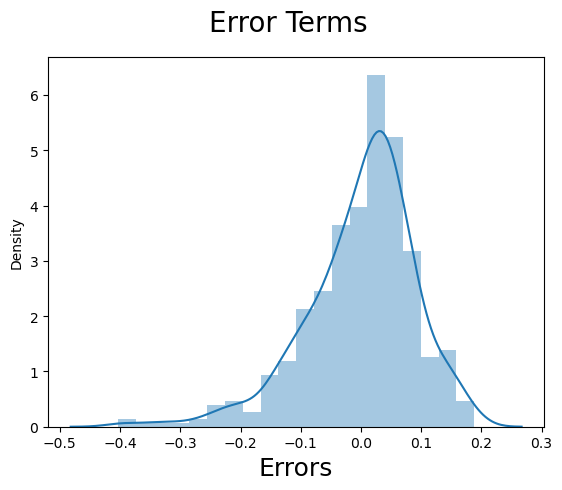

In [495]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [497]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Rain',
       'weathersit_Misty Cloud'],
      dtype='object')

In [498]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered' , 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [500]:
y_test = df_test.pop('cnt')
X_test = df_test

In [501]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [502]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

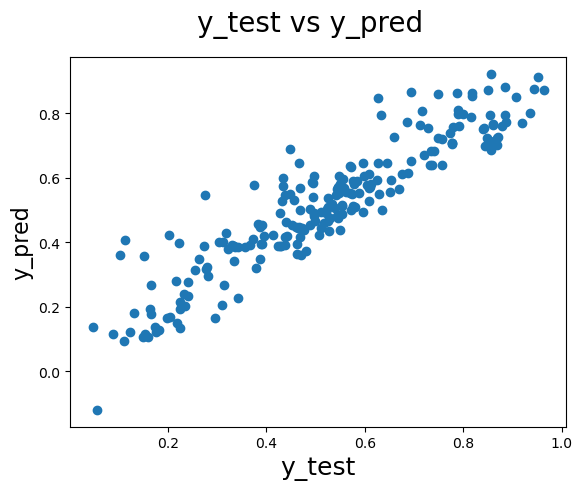

In [503]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [504]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8467596923640821